## Clone Repository Which Contains Dataset

In [ ]:
!git clone https://github.com/rslim087a/track

fatal: destination path 'track' already exists and is not an empty directory.


In [ ]:
!ls track

driving_log.csv  IMG


In [ ]:
!pip3 install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Required Libraries

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mplim
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import random
import ntpath
from keras.layers.convolutional import Convolution2D

In [ ]:
!ls track

driving_log.csv  IMG


In [ ]:
import os

In [ ]:
path='track'#Dataset path
columns=['center','left','right','steering','throttle','reverse','speed']
data=pd.read_csv(os.path.join(path,'driving_log.csv'),names=columns)
pd.set_option('display.max_colwidth',-1)
data.head()#We can observe our first 5 rows in our pandas dataset.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [ ]:
def path_leaf(path):
  head,tail=ntpath.split(path)
  return tail

Our image paths consists of local path which belong to another person. Because we cloned dataset from github. So we need to method that can split our path and returns just with .jpg extension part. <b> path_leaf()</b> method returns our tail of path. 

In [ ]:
data['center']=data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


We got rid of head part of our paths using apply(path_leaf) for all of our center,left and right image path.

## Distribution of our dataset

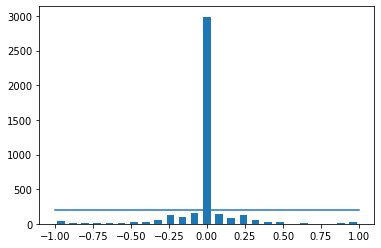

In [ ]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [ ]:
bins

array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
       -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
        0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ])

In [ ]:
hist

array([  35,    6,    6,    6,   13,    8,   24,   22,   53,  131,   99,
        158, 2990,  137,   86,  126,   54,   22,   19,    2,    9,    4,
          4,    6,   33])

In [ ]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))



removed: 2790
remaining: 1263


Firstly we defined an empty list called <b>remove_list</b>.We have nested loops.First loop iterates the len of the number of the bins.Which consists our steerings.At every iteration we define an empty list to balance our data by removing values that remaining above a certain threshold. In our example this threshold can be considered as 400. After we applied this operation 1463 data is remained. 

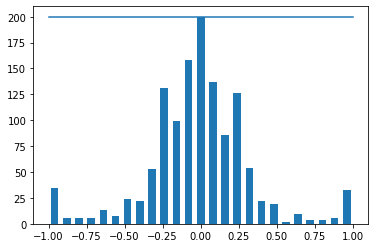

In [ ]:

hist, _ = np.histogram(data['steering'], num_bins)

plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

As we can see, now our distrubition of data is more uniformed.

## Training and Validation Split

In [ ]:
print(data.iloc[40])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering(path + '/IMG', data)
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))
y_valid[0]


center      center_2018_07_16_17_11_48_350.jpg
left        left_2018_07_16_17_11_48_350.jpg  
right       right_2018_07_16_17_11_48_350.jpg 
steering   -0.15                              
throttle    1.0                               
reverse     0.0                               
speed       30.1841                           
Name: 64, dtype: object
Training Samples: 3031
Valid Samples: 758


0.289918

Text(0.5, 1.0, 'y_val distribution')

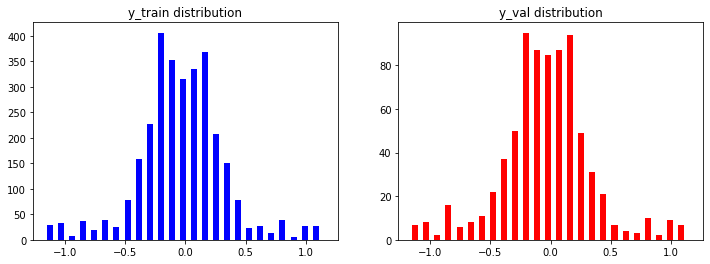

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train,bins=num_bins,width=0.05,color='blue')
axes[0].set_title("y_train distribution")
axes[1].hist(y_valid,bins=num_bins,width=0.05,color='red')
axes[1].set_title("y_val distribution")

## Data Augmentations

In [ ]:
def zoom(img):
  zoom=iaa.Affine(scale=(1,1.3))
  image=zoom.augment_image(img)
  return image


Text(0.5, 1.0, 'Zoomed Image')

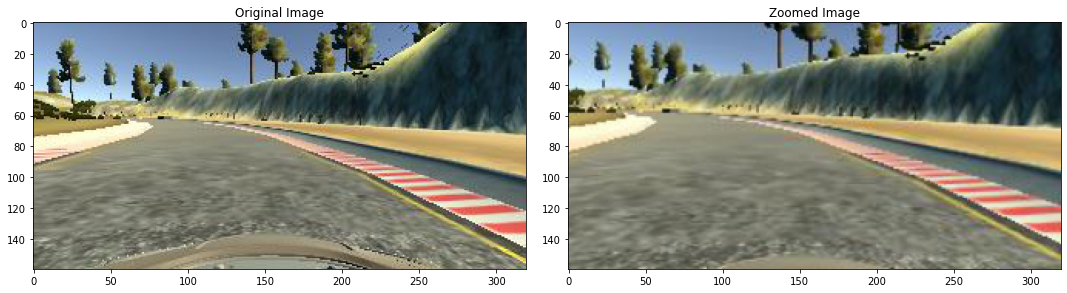

In [ ]:
image=image_paths[random.randint(0,1000)]
original_image=mplim.imread(image)
zoomed_image=zoom(original_image)
fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(zoomed_image)
axes[1].set_title('Zoomed Image')


In [ ]:
def pan(img):
  pan=iaa.Affine(translate_percent={"x":(-0.1,0.1),"y":(-0.1,0.1)})
  img=pan.augment_image(img)
  return img


Text(0.5, 1.0, 'Panned Image')

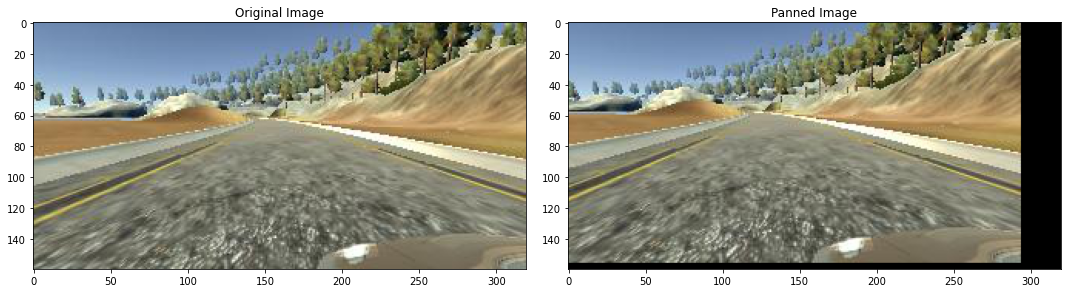

In [ ]:
image=image_paths[random.randint(0,1000)]
original_image=mplim.imread(image)
panned_img=pan(original_image)
fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(panned_img)
axes[1].set_title('Panned Image')


In [ ]:
def img_random_brightness(img):
  brightness=iaa.Multiply((0.2,1.2))
  image=brightness.augment_image(img)
  return image


Text(0.5, 1.0, 'Brightness Altered Image')

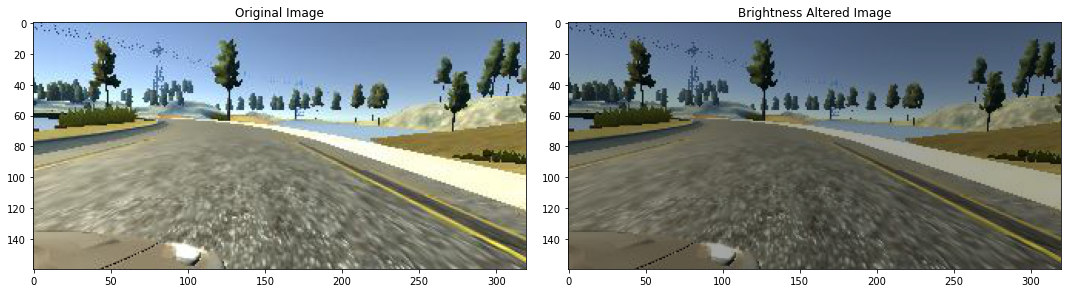

In [ ]:
image=image_paths[random.randint(0,1000)]
original_image=mplim.imread(image)
brightness_altered_img=img_random_brightness(original_image)
fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(brightness_altered_img)
axes[1].set_title('Brightness Altered Image')


In [ ]:
def img_random_flip(image,steering_angle):
  image=cv2.flip(image,1)#Horizontal Flip
  steering_angle=-steering_angle
  return image,steering_angle

Text(0.5, 1.0, 'Flipped Image Flipped Steering Angle:0.05')

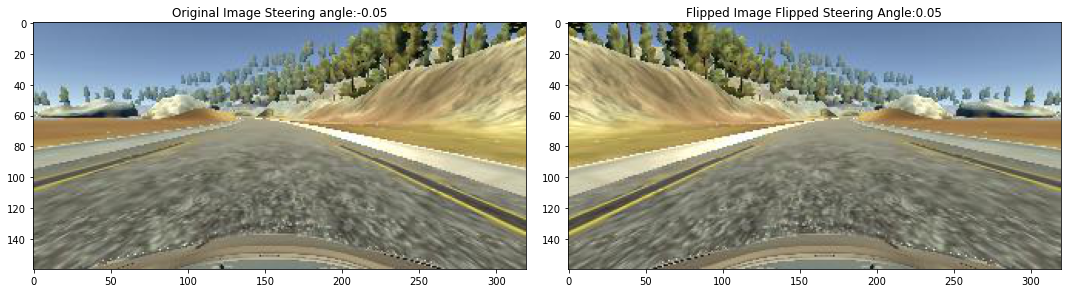

In [ ]:
random_index=random.randint(0,1000)
image=image_paths[random_index]
steering=steerings[random_index]
original_image=mplim.imread(image)
fliiped_img,flipped_steering_angle=img_random_flip(original_image,steering)
fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image'+" Steering angle:"+str(steering))
axes[1].imshow(fliiped_img)
axes[1].set_title('Flipped Image'+" Flipped Steering Angle:"+str(flipped_steering_angle))

In [ ]:
def random_augment(image, steering_angle):
    image = mplim.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle
  
  

In [ ]:
print(y_valid[0])
print(y_train[0])



0.289918
-0.04874708


In [ ]:
ncol=2
nrow=10
fig,axes=plt.subplots(nrow,ncol,figsize=(15,50))
fig.tight_layout()

for i in range(10):
  randnm=random.randint(0,len(image_paths)-1)
  random_image=image_paths[randnm]
  random_steering=steerings[randnm]

  original_image=mplim.imread(random_image)
  augmented_image,steering=random_augment(random_image,random_steering)

  axes[i][0].imshow(original_image)
  axes[i][0].set_title("Original image")

  axes[i][1].imshow(augmented_image)
  axes[i][1].set_title("Augmented image")


## Image Preprocessing

In [ ]:
def img_preprocess(image_to_preprocess):
    
    image_to_preprocess = image_to_preprocess[60 : 135,:,:]
    image_to_preprocess = cv2.cvtColor(image_to_preprocess, cv2.COLOR_RGB2YUV)
    image_to_preprocess = cv2.GaussianBlur(image_to_preprocess,  (3, 3), 0)
    image_to_preprocess = cv2.resize(image_to_preprocess, (200, 66))
    image_to_preprocess = image_to_preprocess/255
    return image_to_preprocess

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):

  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)

      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])

      else:
        im = mplim.imread(image_paths[random_index])
        steering = steering_ang[random_index]

      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

## Model

## Nvdia Model Architecture

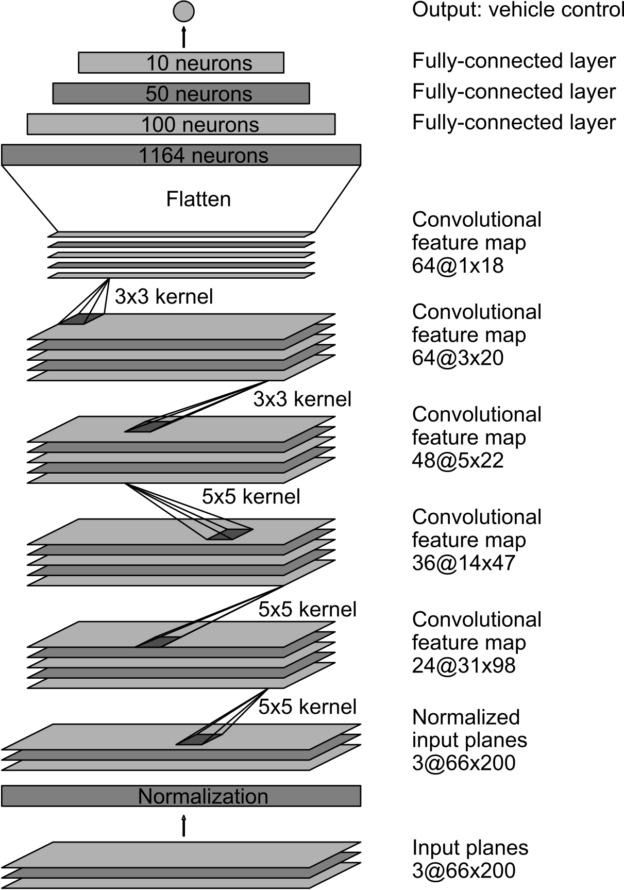

In [ ]:
def nvidia_updated_model():
  model = Sequential()
  model.add(Convolution2D(24,(5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Convolution2D(48, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Convolution2D(64, (3, 3), activation='elu'))

  model.add(Convolution2D(64, (3, 3), activation='elu'))
  #model.add(Dropout(0.5))


  model.add(Flatten())

  model.add(Dense(100, activation = 'elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(50, activation = 'elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(10, activation = 'elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(1))
  optimizer=Adam(learning_rate=1e-3)

  model.compile(loss='mse', optimizer='adam')
  return model

In [ ]:
updated_model=nvidia_updated_model()
updated_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_86 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_87 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_88 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_89 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 flatten_17 (Flatten)        (None, 1152)              0         
                                                                 
 dense_68 (Dense)            (None, 100)             

In [ ]:
history = updated_model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300,
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
300/300 [==============================] - 465s 2s/step - loss: 0.1323 - val_loss: 0.0701
Epoch 2/10
300/300 [==============================] - 458s 2s/step - loss: 0.1448 - val_loss: 0.1933
Epoch 3/10
300/300 [==============================] - 465s 2s/step - loss: 0.1298 - val_loss: 0.1123
Epoch 4/10
300/300 [==============================] - 460s 2s/step - loss: 0.1025 - val_loss: 0.0768
Epoch 5/10
300/300 [==============================] - 449s 1s/step - loss: 0.0955 - val_loss: 0.0835
Epoch 6/10
300/300 [==============================] - 453s 2s/step - loss: 0.0870 - val_loss: 0.0762
Epoch 7/10
300/300 [==============================] - 443s 1s/step - loss: 0.0795 - val_loss: 0.0619
Epoch 8/10
300/300 [==============================] - 445s 1s/step - loss: 0.1020 - val_loss: 0.0868
Epoch 9/10
300/300 [==============================] - 472s 2s/step - loss: 0.0853 - val_loss: 0.0638
Epoch 10/10
300/300 [==============================] - 461s 2s/step - loss: 0.0808 - val_lo

Text(0.5, 0, 'Epoch')

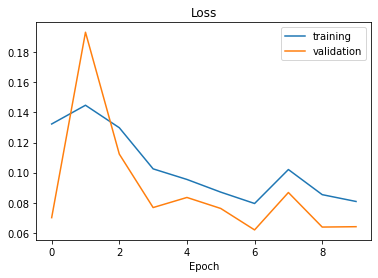

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['training','validation'])
plt.title("Loss")
plt.xlabel("Epoch")

In [ ]:
updated_model.save("model.h5")

In [ ]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>